# Example of using neural network to approximate function

In [1]:
from platform import python_version
python_version()

'2.7.14'

In [2]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Simple one-dimensional function y = f(x)

In [3]:
def f(x):
    return np.sin(2*np.pi*x)

In [4]:
# Generate a set of training data
x = np.linspace(0.0, 1.0, 100).reshape(-1, 1)
y = f(x).ravel()

# Initialize the neural network
nn = MLPRegressor(hidden_layer_sizes=(3), 
                  activation='tanh', solver='lbfgs')

In [5]:
x.shape, y.shape

((100, 1), (100,))

In [6]:
# Train the NN
nn.fit(x, y)

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=3, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

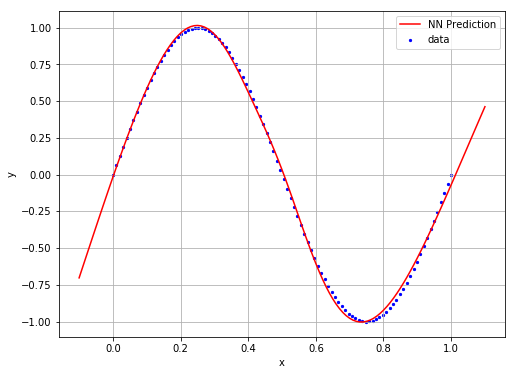

In [7]:
# Compare predictions to the original data
test_x = np.arange(-0.1, 1.1, 0.01).reshape(-1, 1)
y_pred = nn.predict(test_x)
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, s=5, c='b', marker="o", label='data')
ax1.plot(test_x, y_pred, c='r', label='NN Prediction')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

## 2. Multi-dimensional function Y = f(X)

In [8]:
def f(x1, x2):
    return 1.0/(1.0 + 2*x1**2 + 2*x2**2)

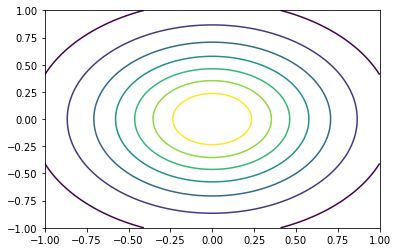

In [9]:
# Display contour plot of function

def contour_plot(f, x1_range=(-1.0, 1.0), x2_range=(-1.0, 1.0), grid_size=(101, 101)):
    nx1, nx2 = grid_size

    x1 = np.linspace(x1_range[0], x1_range[1], nx1)
    x2 = np.linspace(x2_range[0], x2_range[1], nx2)
    x1_grid, x2_grid = np.meshgrid(x1, x2)
    y_grid = f(x1_grid, x2_grid)

    h = plt.contour(x1_grid, x2_grid, y_grid)

contour_plot(f)

In [10]:
# Generate a set of training data
nx1, nx2 = 11, 11

x1 = np.linspace(-1.0, 1.0, nx1)
x2 = np.linspace(-1.0, 1.0, nx2)
x1_grid, x2_grid = np.meshgrid(x1, x2)
y_grid = f(x1_grid, x2_grid)

In [11]:
X = np.concatenate((x1_grid.reshape(-1, 1), x2_grid.reshape(-1, 1)), axis=1)
y = y_grid.ravel()

X.shape, y.shape

((121, 2), (121,))

In [12]:
# Initialize the neural network
nn = MLPRegressor(hidden_layer_sizes=(5),  # Add more units to improve fit
                  activation='tanh',
                  solver='lbfgs',
                  tol=1e-6,                # reduce tolerance to improve fit
                  max_iter=2000            # Add more iterations to improve fit
)

In [13]:
nn.fit(X, y)

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=5, learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=1e-06, validation_fraction=0.1,
       verbose=False, warm_start=False)

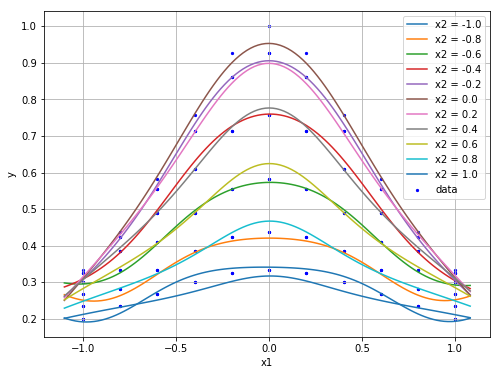

In [14]:
# Compare predictions to the original data

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)

ax1.scatter(X[:,0], y, s=5, c='b', marker="o", label='data')

test_x1 = np.arange(-1.1, 1.1, 0.02)
test_X = np.empty((test_x1.shape[0], 2))

for x2_value in x2:
    
    test_X[:, 0] = test_x1
    test_X[:, 1] = x2_value

    y_pred = nn.predict(test_X)

    ax1.plot(test_x1, y_pred, label='x2 = {}'.format(x2_value))

plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [15]:
def f_nn(x1, x2):
    if isinstance(x1, float) and isinstance(x2, float):
        return float(nn.predict(np.array((x1, x2)).reshape(1,2)))
    else:
        X = np.concatenate((np.array(x1).reshape(-1, 1), np.array(x2).reshape(-1, 1)), axis=1)
        y_pred = nn.predict(X)
        return y_pred.reshape(x1.shape[0], -1)

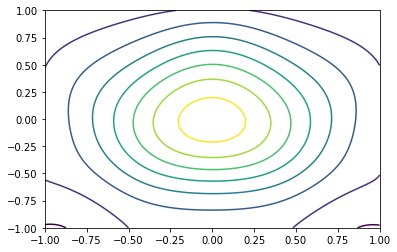

In [16]:
contour_plot(f_nn)

## Testing Accuracy and Generalization

In [17]:
# Generate a set of test data
n = 100

x1 = np.random.randn(n)
x2 = np.random.randn(n)

X_test = np.concatenate((x1.reshape(-1, 1), x1.reshape(-1, 1)), axis=1)
y_pred = nn.predict(X_test)
y_true = f(X_test[:,0], X_test[:,1])

y_pred.shape, y_true.shape

((100,), (100,))

In [18]:
# mean_squared_error(y_true, y_pred, sample_weight=None, multioutput='uniform_average')

from sklearn.metrics import mean_squared_error

mean_squared_error(y_true, y_pred)

0.00027038473776741642